# Практическая работа №2: Классические методы математической статистики

Выполнил студент гр. 1384 Тапеха Владимир. Вариант №17.

## Цель работы

Научится применять методы математической статистики для визуализации и анализа полученных данных; сформировать навыки реализации методов с помощью прикладных программных пакетов.

## Основные теоретические положения

//!TODO

## Постановка задачи

Для полученных в результате эксперимента наборов данных выполнить статистическую обработку. Полученные результаты содержательно проинтерпретировать.

1. В результате эксперимента получены данные, приведјнные в таблице 1.
    
    a. Построить вариационный ряд, эмпирическую функцию распределения и гистограмму частот.
    
    b. Вычислить выборочные аналоги следующих числовых характеристик:
    - математического ожидания; 
    - дисперсии; 
    - СКО; 
    - медианы; 
    - асимметрии; 
    - экцесса; 
    - вероятности $\mathbb{P}(X \in [a, b])$

    c. В предположении, что исходные наблюдения являются выборкой из Пуассона распределения, построить оценку максимального правдоподобия параметра $\lambda$, а также оценку $\lambda$ по методу моментов. Найти смещение оценок.

    d. Построить доверительные интервалы уровня значимости $\alpha_{1}$ для параметра $\lambda$ на базе оценки максимального правдоподобия. 


## Выполнение работы

Импортируем библиотеки.

In [77]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.optimize import minimize

#### №1. a)Построить вариационный ряд, эмпирическую функцию распределения и гистограмму частот.

*Вариационный ряд*

In [78]:
series = '1 1 3 0 0 0 1 1 3 5 2 1 2 0 0 1 11 2 0 4 1 0 5 0 1 3 1 8 0 1 2 6 1 0 0 0 0 0 0 9 2 0 12 2 0 0 2 1 4 1'
variation_series = np.sort(np.array(list(map(int, series.split()))))

print(*variation_series)

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 3 3 3 4 4 5 5 6 8 9 11 12


*Эмперическая функция распределения*

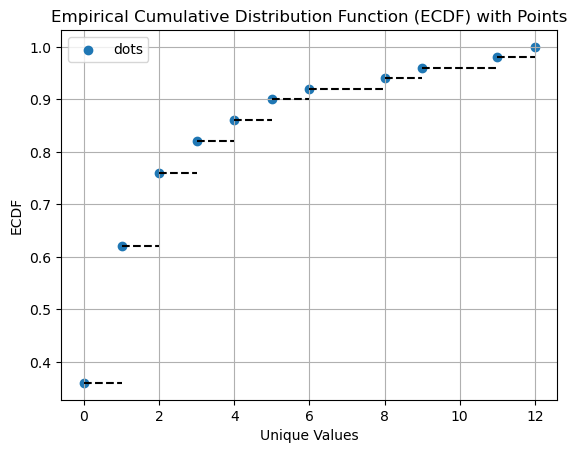

In [79]:
df = pd.DataFrame(variation_series, columns=['Values'])

ecdf = sm.distributions.ECDF(df['Values'])
x = np.unique(df['Values'])
y = ecdf(x)

plt.scatter(x, y, marker='o', label='dots')

for i in range(len(x) - 1):
    plt.plot([x[i], x[i + 1]], [y[i], y[i]], color='k', linestyle='dashed')

plt.xlabel('Unique Values')
plt.ylabel('ECDF')
plt.title('Empirical Cumulative Distribution Function (ECDF) with Points')
plt.legend()
plt.grid(True)
plt.show()

*Гистограма*

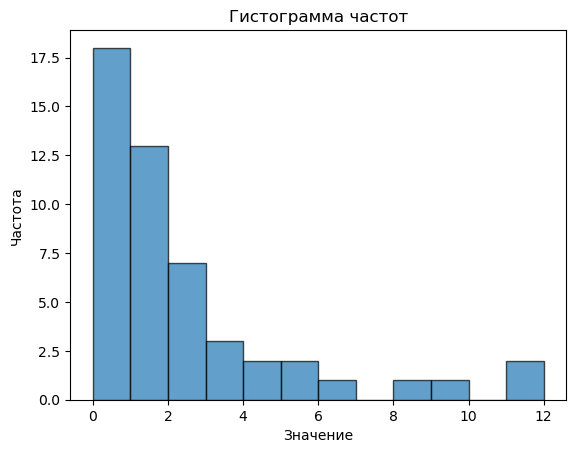

In [80]:
plt.hist(variation_series,
         bins=range(min(variation_series), max(variation_series) + 1),
         edgecolor='black', alpha=0.7)

plt.title('Гистограмма частот')
plt.xlabel('Значение')
plt.ylabel('Частота')

plt.show()

b) Вычислить выборочные аналоги следующих числовых характеристик

In [81]:
mean = np.mean(variation_series)
print(f"Математическое ожидание: {mean}")

var = np.var(variation_series)
print(f"Дисперсия: {var}")

std = np.std(variation_series)
print(f"Стандартное отклонение: {std}")

median = np.median(variation_series)
print(f"Медиана: {median}")

skew = st.skew(variation_series)
print(f"Асимметрия: {skew}")

kurtois = st.kurtosis(variation_series, fisher=True) 
print(f"Эксцесса: {kurtois}")

Математическое ожидание: 2.0
Дисперсия: 7.92
Стандартное отклонение: 2.814249455894058
Медиана: 1.0
Асимметрия: 2.035097747030827
Эксцесса: 3.6995714722987456


In [82]:
df = pd.DataFrame(variation_series, columns=['Values'])
value_counts = df['Values'].value_counts()
probabilities_pandas = value_counts / len(df)

print("Вероятности:")
print(probabilities_pandas)

Вероятности:
0     0.36
1     0.26
2     0.14
3     0.06
4     0.04
5     0.04
6     0.02
8     0.02
9     0.02
11    0.02
12    0.02
Name: Values, dtype: float64


#### Закон распределения Пуассона

$$
    P_k(\lambda) = \frac{\lambda^k}{k!}\exp(-\lambda), k = 1, \ldots, n
$$

*ОМП*

Найдем функцию правдоподобия для параметра $\lambda$

$$
L(\overline k, \lambda) = \prod_{i = 1}^n \frac{\lambda^{k_i}}{k_i!}\exp(-\lambda) = \exp(-n\lambda)\lambda^{\sum_{i = 1}^n k_i} \prod_{i = 1}^n \frac{1}{k_i!}
$$

Логарифм функции правдподобия

$$
LL(\overline k, \lambda) = -n\lambda + \sum_{i = 1}^n k_i \ln(\lambda) + \sum_{i = 1}^n \ln(\frac{1}{k_i!})
$$

Найдем максимум от $LL(\overline k, \lambda)$:

$$\frac{\partial LL(\overline k, \lambda)}{\partial \lambda} = -n + \sum_{i=1}^n k_i \frac{1}{\lambda}$$

$$
-n + \sum_{i=1}^n k_i \frac{1}{\lambda} = 0
$$

$$
\hat \lambda = \frac{1}{n} \sum_{i=1}^n k_i = \overline k
$$

Проверим оценку на несмещенность:

$$
\mathbb{E} \hat \lambda = \frac{1}{n} \sum_{i=1}^{n} \mathbb{E} k_i = \frac{1}{n} \sum_{i=1}^{n} \lambda = \frac{1}{n} \cdot n \lambda = \lambda. 
$$  

Оценка является несмещенной, так как смещение равно 0.

In [83]:
def log_func(parameters, data):
    lam = parameters
    log_likelihood_values = st.poisson.logpmf(data, mu=lam)
    return -np.sum(log_likelihood_values)

initial_lambda = mean
omp = minimize(log_func, mean, args=(variation_series,))

estimated_lambda = omp.x[0]

print(f"Оценка максимального правдоподобия для лямбды: {estimated_lambda}")

Оценка максимального правдоподобия для лямбды: 2.0


Построим оценку по методу моментов. Для этого приравняем момент первого порядка к математическому ожиданию для распределения Пуассона. 

$$
\hat \lambda = \hat \lambda_{ML} = \bar{k} = 2
$$

Оценка совпала с ОМП, поэтому она также несмещенная.

##### d. Построить доверительные интервалы уровня значимости $\alpha_{1}$ для параметра $\lambda$ на базе оценки максимального правдоподобия. 

 $$\hat \lambda_{ML} = \frac{1}{n}\sum_{i=1}^n k_i = \overline k$$
  Имеет асимптотически нормальное распределние по центральной предельной теореме Леви

$$\mathbb{D} \hat \lambda_{ML} = \frac{1}{n^2} \sum_{i=1}^n \lambda = \frac{1}{n^2} \cdot n\lambda = \frac{\lambda}{n}$$

$$
\frac{\hat \lambda_{ML} - \mathbb{E}\hat\lambda_{ML}}{\sqrt{\mathbb{D}\hat\lambda_{ML}}} = \frac{\hat\lambda_{ML} - \lambda}{\sqrt{\lambda}} \cdot \sqrt n - \text{Имеет асимптотическое $\mathbb{N}(0;1)$ распределение}
$$

$$\lim_{n \to \infty} \mathbb{P}(-k_{1 - \frac{\alpha}{2}} \leq \frac{\hat \lambda_{ML} - \lambda}{\sqrt{\hat \lambda_{ML}}} \sqrt{n} \leq k_{1 - \frac{\alpha}{2}}) = 1 - \alpha$$

$$\lim_{n \to \infty}\mathbb{P}(\lambda_{ML} - k_{1 - \frac{\alpha}{2}} \cdot \sqrt{\frac{\hat\lambda_{ML}}{n}} \leq \lambda \leq \lambda_{ML} + k_{1 - \frac{\alpha}{2}} \cdot \sqrt{\frac{\hat\lambda_{ML}}{n}}) = 1 - \alpha$$

$$
\hat \lambda \in \left[\lambda_{ML} - k_{1 - \frac{\alpha}{2}} \cdot \sqrt{\frac{\hat\lambda_{ML}}{n}};\lambda_{ML} + k_{1 - \frac{\alpha}{2}} \cdot \sqrt{\frac{\hat\lambda_{ML}}{n}}\right]
$$

In [89]:
std_error = std / np.sqrt(len(variation_series))


alpha = 0.01 # случайное альфа
confidience_interval = st.norm.interval(1 - alpha, loc=mean, scale=std_error)

print(f'Асимптотический доверительный интервал: {confidience_interval}')

Асимптотический доверительный интервал: (0.9748328811350999, 3.0251671188649)


## Выводы

В ходе выполнения практической работы были изучены свойства многомерного случайного вектора имеющего нормальное распределение. Вычислены характеристики исходного случайного вектора. Изучено афинное преобразование, переводящее исходный случайный вектор в стандартный. Было найдено ортогональное преобразование, переводящего соответствующий центрированный случайный вектор в вектор с независимыми компонентами. Были построены графики плотности полученных распределений.